<a href="https://colab.research.google.com/github/EINSHOWERADMIRAL/EINSHOWERADMIRAL/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

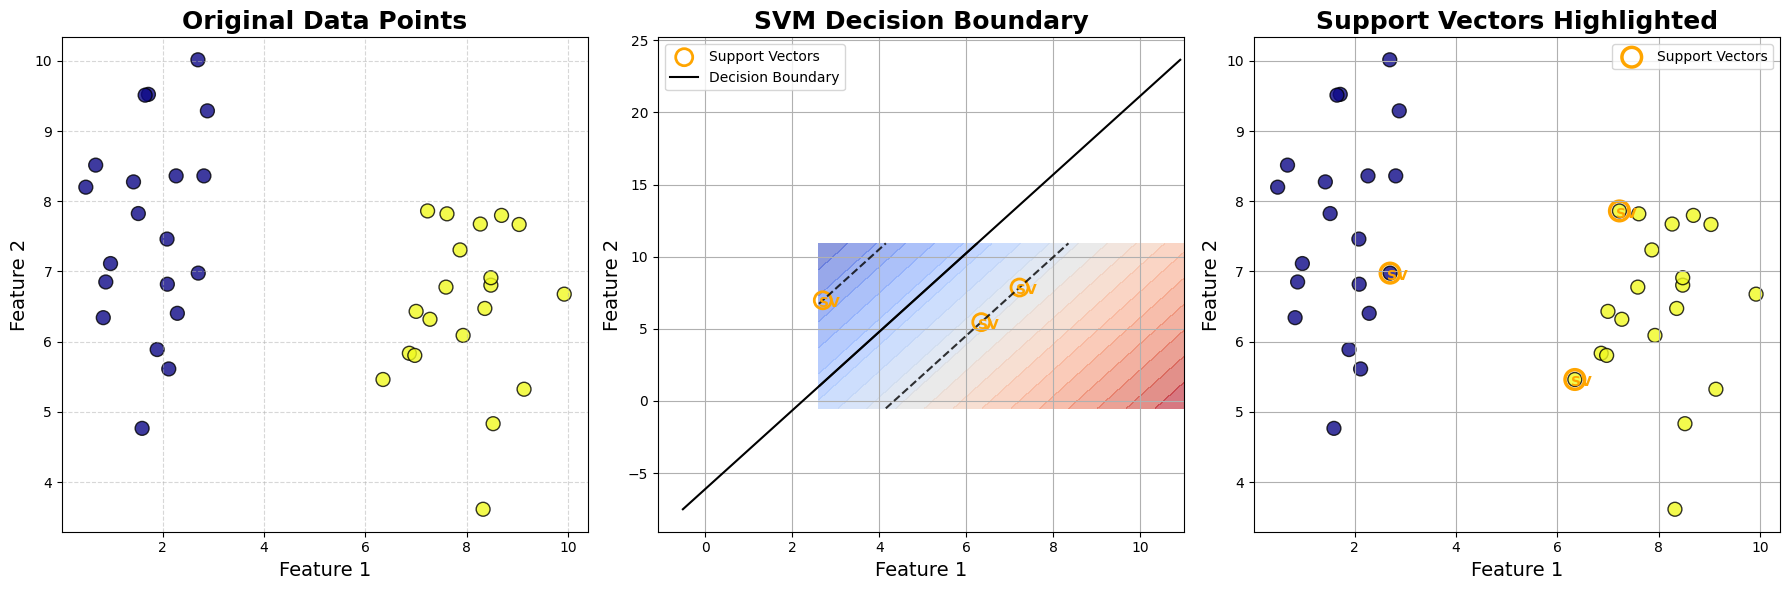

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# Generate synthetic data
x, y = make_blobs(n_samples=40, centers=2, random_state=20)

# Create and fit the SVM classifier (no regularization for illustration)
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(x, y)

# Create a grid to plot decision boundaries
xlim = (x[:, 0].min() - 1, x[:, 0].max() + 1)
ylim = (x[:, 1].min() - 1, x[:, 1].max() + 1)

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(xx, yy)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Compute decision function values for the grid points
Z = clf.decision_function(xy).reshape(XX.shape)

# Set up a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

### Plot 1: Original Data Points ###
axs[0].scatter(x[:, 0], x[:, 1], c=y, s=100, cmap='plasma', alpha=0.8, edgecolor='k', marker='o')
axs[0].set_title('Original Data Points', fontsize=18, fontweight='bold')
axs[0].set_xlabel('Feature 1', fontsize=14)
axs[0].set_ylabel('Feature 2', fontsize=14)
axs[0].grid(True, linestyle='--', alpha=0.5)

### Plot 2: Decision Boundary ###
contour_fill = axs[1].contourf(XX, YY, Z, levels=np.linspace(Z.min(), Z.max(), 20), cmap='coolwarm', alpha=0.6)
contour_lines = axs[1].contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.8,
                               linestyles=['--', '-', '--'])
axs[1].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=150, linewidth=2, facecolors='none', edgecolor='orange', label='Support Vectors')

# Annotate support vectors with a different style
for i in range(len(clf.support_vectors_)):
    axs[1].annotate('SV', (clf.support_vectors_[i][0], clf.support_vectors_[i][1]),
                    textcoords="offset points", xytext=(5,-5), ha='center',
                    fontsize=10, color='orange', fontweight='bold')

axs[1].set_title('SVM Decision Boundary', fontsize=18, fontweight='bold')
axs[1].set_xlabel('Feature 1', fontsize=14)
axs[1].set_ylabel('Feature 2', fontsize=14)
axs[1].grid(True)

# Extend hyperplane lines across the plot area
x_hyperplane = np.linspace(xlim[0], xlim[1])
y_hyperplane = -(clf.coef_[0][0] / clf.coef_[0][1]) * x_hyperplane - (clf.intercept_[0] / clf.coef_[0][1])
axs[1].plot(x_hyperplane, y_hyperplane, 'k-', label='Decision Boundary')

### Plot 3: Support Vectors ###
axs[2].scatter(x[:, 0], x[:, 1], c=y, s=100, cmap='plasma', alpha=0.8, edgecolor='k')
axs[2].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=200, linewidth=2.5, facecolors='none', edgecolor='orange', label='Support Vectors')
axs[2].set_title('Support Vectors Highlighted', fontsize=18, fontweight='bold')
axs[2].set_xlabel('Feature 1', fontsize=14)
axs[2].set_ylabel('Feature 2', fontsize=14)

# Annotate support vectors in Plot 3 with a different style
for i in range(len(clf.support_vectors_)):
    axs[2].annotate('SV', (clf.support_vectors_[i][0], clf.support_vectors_[i][1]),
                    textcoords="offset points", xytext=(5,-5), ha='center',
                    fontsize=10, color='orange', fontweight='bold')

axs[2].grid(True)

# Add legends to clarify support vectors and decision boundary
axs[1].legend()
axs[2].legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()